In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("weather.csv",sep=";")
data.drop("Sunshine Duration",axis=1, inplace=True)
data.drop("Shortwave Radiation",axis=1, inplace=True)
data.drop("DateTime",axis=1, inplace=True)
data.drop("Mean Sea Level Pressure",axis=1, inplace=True)
data.drop("Wind Direction",axis=1, inplace=True)
data.columns = ["Sıcaklık","Nem","Toprak Sıcaklık","Toprak Nem","Rüzgar Hız"]

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [26]:
x = data.drop("Sıcaklık", axis=1).values
y = data["Sıcaklık"].values

x_tr, x_te, y_tr, y_te = train_test_split(x,y, test_size=0.1)
model = LinearRegression()
model.fit(x_tr, y_tr)

y_p = model.predict(x_te)
print(r2_score(y_te,y_p))
print(model.score(x_te,y_te))

0.9188111708110187
0.9188111708110187


In [27]:
import statsmodels.api as sm
o = sm.OLS(y_tr,x_tr).fit()
o.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                          1.403e+06
Date:                Sat, 29 Jan 2022   Prob (F-statistic):                        0.00
Time:                        00:43:37   Log-Likelihood:                     -2.5602e+05
No. Observations:              110459   AIC:                                  5.120e+05
Df Residuals:                  110455   BIC:                                  5.121e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0461      0.000   -133.295      0.000      -0.047      -0.045
x2             0.9968      0.001   1380.239      0.000       0.995       0.998
x3            12.1582      0.108    112.609      0.000      11.947      12.370
x4            -0.0028      0.001     -4.307      0.000      -0.004      -0.002
==============================================================================
Omnibus:                      380.162   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              384.040
Skew:                           0.144   Prob(JB):                     4.04e-84
Kurtosis:                       3.030   Cond. No.                     1.11e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

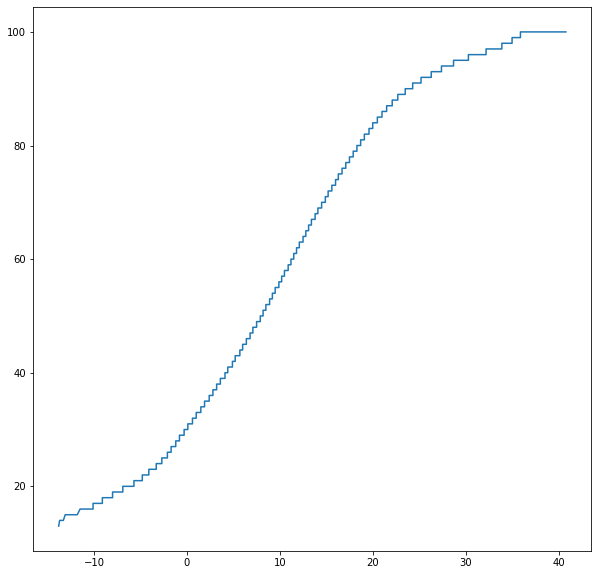

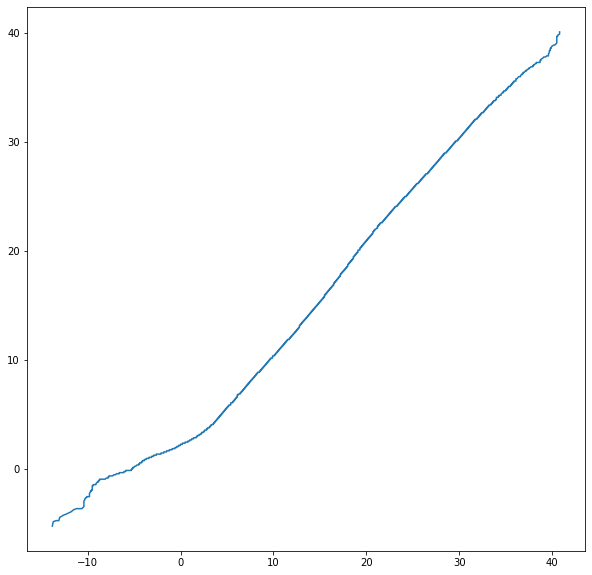

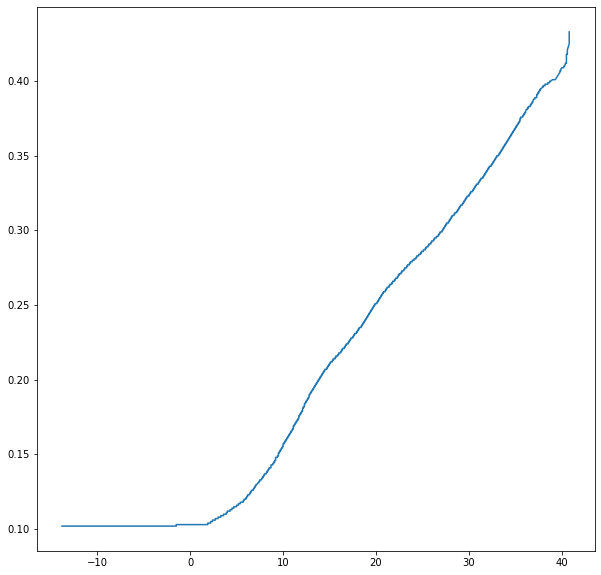

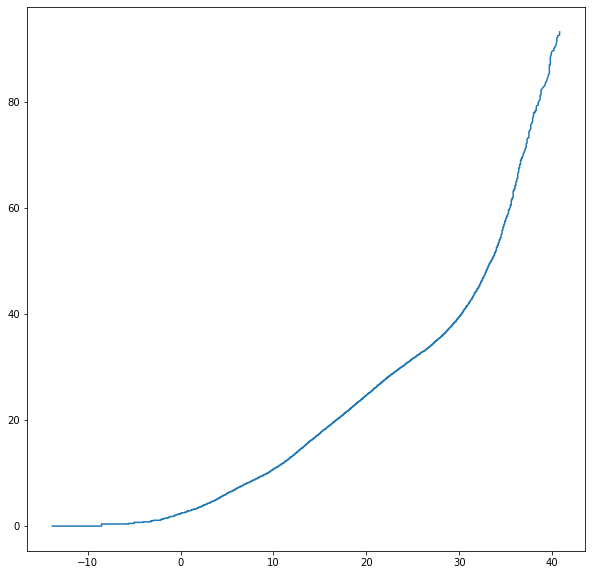

In [28]:
plt.figure(figsize=(10,10))
plt.plot(data["Sıcaklık"].sort_values(),data["Nem"].sort_values())
plt.show()

plt.figure(figsize=(10,10))
plt.plot(data["Sıcaklık"].sort_values(),data["Toprak Sıcaklık"].sort_values())
plt.show()

plt.figure(figsize=(10,10))
plt.plot(data["Sıcaklık"].sort_values(),data["Toprak Nem"].sort_values())
plt.show()

plt.figure(figsize=(10,10))
plt.plot(data["Sıcaklık"].sort_values(),data["Rüzgar Hız"].sort_values())
plt.show()

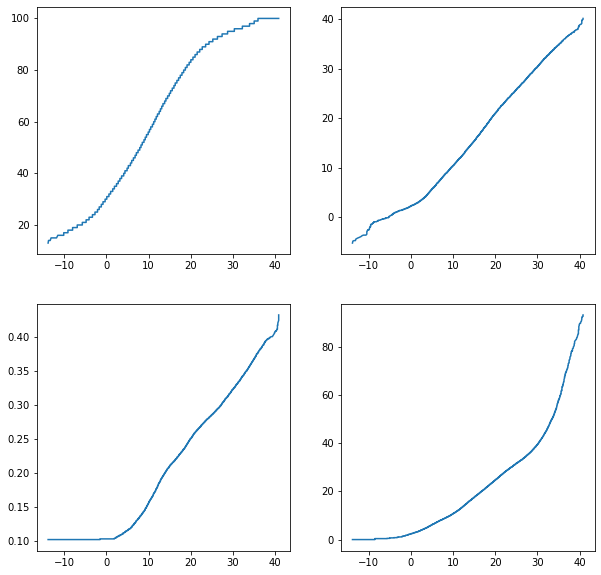

In [41]:
plt.figure(figsize=(10,10))
plt.subplot(221).plot(data["Sıcaklık"].sort_values(),data["Nem"].sort_values())
plt.subplot(222).plot(data["Sıcaklık"].sort_values(),data["Toprak Sıcaklık"].sort_values())
plt.subplot(223).plot(data["Sıcaklık"].sort_values(),data["Toprak Nem"].sort_values())
plt.subplot(224).plot(data["Sıcaklık"].sort_values(),data["Rüzgar Hız"].sort_values())
plt.show()